In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [2]:
data = pd.read_csv('./data_sets/combined_2020-05-19.csv')

In [3]:
data.columns

Index(['Unnamed: 0', 'latitude', 'longitude', 'postal_code', 'address',
       'nearest_mrt_dist', 'nearest_mall_dist', 'nearest_govt_aided_dist',
       'nearest_funded_dist', 'nearest_sap_dist', 'town', 'flat_type',
       'flat_model', 'floor_area_sqm', 'street_name', 'resale_price', 'month',
       'remaining_lease', 'lease_commence_date', 'storey_range', '_id',
       'block'],
      dtype='object')

In [4]:
# Create target price per sqft
data['price_per_sqft'] = ((data['resale_price'] / data['floor_area_sqm']) / 10.764).round(2)
data['price_per_sqft']

0        489.85
1        496.18
2        443.40
3        426.51
4        464.51
          ...  
69928    439.85
69929    419.56
69930    511.48
69931    315.20
69932    313.41
Name: price_per_sqft, Length: 69933, dtype: float64

In [5]:
if list(data.columns)[0] == 'Unnamed: 0':
    data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69933 entries, 0 to 69932
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   latitude                 69933 non-null  float64
 1   longitude                69933 non-null  float64
 2   postal_code              69933 non-null  int64  
 3   address                  69933 non-null  object 
 4   nearest_mrt_dist         69933 non-null  float64
 5   nearest_mall_dist        69933 non-null  float64
 6   nearest_govt_aided_dist  69933 non-null  float64
 7   nearest_funded_dist      69933 non-null  float64
 8   nearest_sap_dist         69933 non-null  float64
 9   town                     69933 non-null  object 
 10  flat_type                69933 non-null  object 
 11  flat_model               69933 non-null  object 
 12  floor_area_sqm           69933 non-null  float64
 13  street_name              69933 non-null  object 
 14  resale_price          

Text(0.5, 1.0, 'Change in House price with lease years remaining')

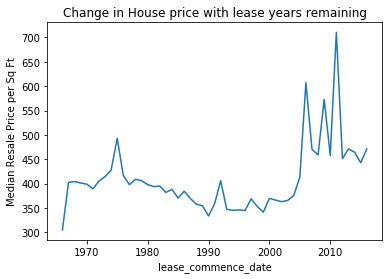

In [6]:
data.groupby('lease_commence_date')['price_per_sqft'].median().plot()
plt.ylabel('Median Resale Price per Sq Ft')
plt.title('Change in House price with lease years remaining')

In [7]:
def analyse_corr_col(df, col):
    df = df.copy()
    
    plt.scatter(df[col], df['price_per_sqft'])
    plt.ylabel('price_per_sqft')
    plt.xlabel(col)
    plt.show()

In [8]:
float_cols = []
for col in list(data.columns):
    if data[col].dtype == np.float:
        print(col)
        float_cols.append(col)

latitude
longitude
nearest_mrt_dist
nearest_mall_dist
nearest_govt_aided_dist
nearest_funded_dist
nearest_sap_dist
floor_area_sqm
resale_price
_id
price_per_sqft


In [9]:
def analyse_continuous(df, col):
    df = df.copy()
    df[col].hist(bins=30)
    plt.ylabel('Number of houses')
    plt.xlabel(col)
    plt.title(col)
    plt.show()

In [10]:
def analyse_transformed_continuous(df, col):
    df = df.copy()

    if any(data[col] <= 0):
        pass
    else:
        df[col] = np.log(df[col])
        df[col].hist(bins=30)
        plt.ylabel('Number of houses')
        plt.xlabel(col)
        plt.title(col)
        plt.show()

In [11]:
def find_outliers(df, col):
    df = df.copy()

    if any(data[col] <= 0):
        pass
    else:
        df[col] = np.log(df[col])
        df.boxplot(column=col)
        plt.title(col)
        plt.ylabel(col)
        plt.show()

In [12]:
data.to_csv('./data_sets/preprocessed_data.csv', index=False)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69933 entries, 0 to 69932
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   latitude                 69933 non-null  float64
 1   longitude                69933 non-null  float64
 2   postal_code              69933 non-null  int64  
 3   address                  69933 non-null  object 
 4   nearest_mrt_dist         69933 non-null  float64
 5   nearest_mall_dist        69933 non-null  float64
 6   nearest_govt_aided_dist  69933 non-null  float64
 7   nearest_funded_dist      69933 non-null  float64
 8   nearest_sap_dist         69933 non-null  float64
 9   town                     69933 non-null  object 
 10  flat_type                69933 non-null  object 
 11  flat_model               69933 non-null  object 
 12  floor_area_sqm           69933 non-null  float64
 13  street_name              69933 non-null  object 
 14  resale_price          

In [14]:
data.columns

Index(['latitude', 'longitude', 'postal_code', 'address', 'nearest_mrt_dist',
       'nearest_mall_dist', 'nearest_govt_aided_dist', 'nearest_funded_dist',
       'nearest_sap_dist', 'town', 'flat_type', 'flat_model', 'floor_area_sqm',
       'street_name', 'resale_price', 'month', 'remaining_lease',
       'lease_commence_date', 'storey_range', '_id', 'block',
       'price_per_sqft'],
      dtype='object')